In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import co2 data from .txt file, skip first 53 rows

url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt'

df = pd.read_csv(url, header=None, skiprows=53, delim_whitespace=True, parse_dates=[[0, 1]])
df.head()

,0_1,2,3,4,5,6,7
0,1958-03-01,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958-04-01,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05-01,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958-06-01,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958-07-01,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [3]:
# Remove some columns

df = df.drop(columns=[2, 3, 5, 6, 7])
df.head()

,0_1,4
0,1958-03-01,314.43
1,1958-04-01,315.16
2,1958-05-01,314.71
3,1958-06-01,315.14
4,1958-07-01,315.18


In [4]:
# Add headers

header = ['DateTime', 'CO2 (parts per million)'] 

df.columns = header
df.head()

,DateTime,CO2 (parts per million)
0,1958-03-01,314.43
1,1958-04-01,315.16
2,1958-05-01,314.71
3,1958-06-01,315.14
4,1958-07-01,315.18


In [5]:
# Read bottom value

CO2_latest = df.loc[len(df) - 1, 'CO2 (parts per million)']
CO2_latest_date = df.loc[len(df) - 1, 'DateTime']

In [6]:
# Get Month and Year bottom value for labels and filenames

FileMonthYear = CO2_latest_date.strftime('%y_%m')
MonthYear = CO2_latest_date.strftime('(%m/%y): ')

In [7]:
# Remove dates before 2005

res = df[~(df['DateTime'] < '2005-01-01')]
res.head()

,DateTime,CO2 (parts per million)
562,2005-01-01,378.37
563,2005-02-01,379.10
564,2005-03-01,379.45
565,2005-04-01,379.84
566,2005-05-01,379.49


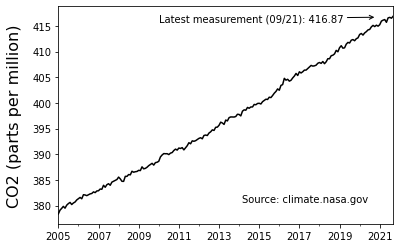

In [8]:
# Plot graph

ax = res.plot(kind='line', x = 'DateTime', y ='CO2 (parts per million)', fontsize=10, legend=False, color = 'black')
ax.set_xlabel(None)
ax.set_ylabel("CO2 (parts per million)", fontsize=16, labelpad=10)

#ax.annotate('Lastest measurement - 415.88 ppm', xycoords='axes fraction', xy=(0.8,0.9), 
     #       xytext=(0.3,0.9), arrowprops={'arrowstyle': '->'}, va='right')



ax.annotate('Latest measurement ' + MonthYear + str(CO2_latest), xy = (0.95,0.95), xytext = (0.3,0.93), 
            arrowprops={'arrowstyle': '->'}, xycoords='axes fraction')

ax.annotate('Source: climate.nasa.gov', xy = (0.55,0.1), xycoords='axes fraction')

plot = ax.get_figure()
plot.set_facecolor('white')
plot.savefig(FileMonthYear + "_co2" + '.png', bbox_inches='tight', dpi=600)